<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


---
## 01. Examples of RGB Image Convolution


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will use a RGB image to show how convolution works.

---

---

## The Image

In order to show the effects of convolutional filters on RGB images, we will use an example file with a size of 32 pixels by 32 pixels with three channels (RGB). 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab Notebooks/Neural Networks/04. Convolution/RGBMario.png')


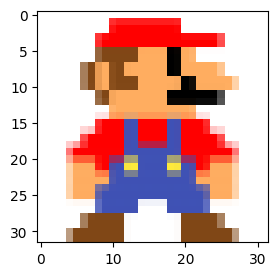

In [2]:
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.show()

In [3]:
np_img = np.asarray(img)
np_img.shape

(32, 32, 3)

In [4]:
np_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

These images are already 'normalized', i.e. the entries in the array are numbers in the range [0,1],

In [5]:
np_img = np_img/255
np_img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

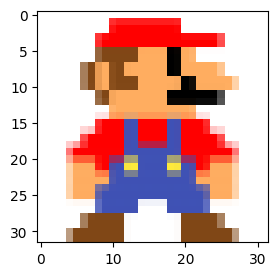

In [6]:
plt.figure(figsize=(3,3))
plt.imshow(np_img)
plt.show()

## The Convolution



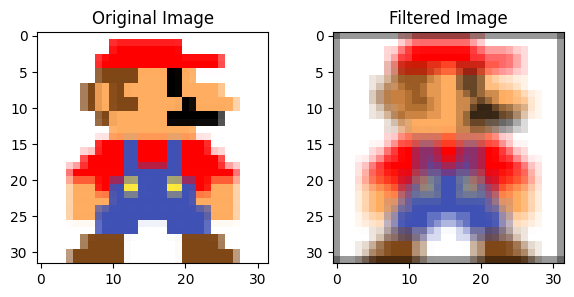

In [7]:
def convol_RGBimg(image, kernel):
  n = len(image)
  temp_img = np.zeros([n+2,n+2,3])
  temp_img[1:-1,1:-1,:] = image
  conv_img = np.zeros([n,n,3])
  
  for c in range(3):
    for i in range(n):
      for j in range(n):
        conv_img[i,j,c] = np.sum(np.multiply(kernel,temp_img[i:i+3,j:j+3,c]))
  
  conv_img = conv_img/np.max(conv_img)
  fig, ax = plt.subplots(1,2, figsize=(7,3))
  ax[0].imshow(image)
  ax[0].set_title('Original Image')
  ax[1].imshow(conv_img)
  ax[1].set_title('Filtered Image')
  plt.show()
  
  return conv_img



kernel = np.array([[1,0,1],
                   [0,1,0],
                   [1,0,1]])

c_img = convol_RGBimg(np_img, kernel)

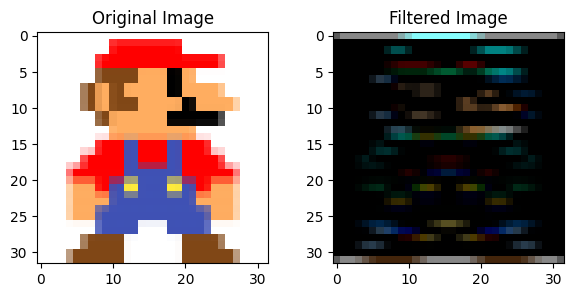

In [15]:
identity = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]])

ridge = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])

sharpen = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

box_blur = (1/9)*np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]])

gauss_blur = (1/16)*np.array([[1,2,1],
                              [2,4,2],
                              [1,2,1]])

h_lines = np.array([[-1,-1,-1],
                    [2,2,2],
                    [-1,-1,-1]])

v_lines = np.array([[-1,2,-1],
                    [-1,2,-1],
                    [-1,2,-1]])

inc_lines = np.array([[-1,-1,2],
                      [-1,2,-1],
                      [2,-1,-1]])

c_img = convol_RGBimg(np_img, h_lines)

In [ ]:
c_img

array([[0.46448087, 0.69672131, 0.69672131, ..., 0.69672131, 0.69672131,
        0.46448087],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46448087, 0.69672131, 0.69672131, ..., 0.69672131, 0.69672131,
        0.46448087]])